# Contents In The Notebook
* Importing Essential Libraries
* Getting Data Ready

## Importing Essential Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting Data Ready

In [24]:
df = pd.read_csv("C:/Users/harsh/Desktop/globalterrorism.csv")

C:\Users\harsh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Link to the dataset: https://bit.ly/2TK5Xn5

In [25]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [26]:
features_with_na = []
for feature in df.columns:
    if df[feature].isnull().sum() >= 1:
        perc = df[feature].isnull().mean() * 100
        features_with_na.append([np.round(perc, 2), feature])
        
def sort_f(e):
    return e[0]
    
features_with_na.sort(reverse = True, key = sort_f)        

d = {"Feature": [], "% Missing Values": []}
    
for x in features_with_na:
    d["Feature"].append(x[1]) 
    d["% Missing Values"].append(x[0])

nl = pd.DataFrame(d).sort_values(by = '% Missing Values', ascending = False)
nl.head(25)

,Feature,% Missing Values
0,gsubname3,99.99
1,weaptype4,99.96
2,weaptype4_txt,99.96
3,weapsubtype4,99.96
4,weapsubtype4_txt,99.96
5,claimmode3,99.93
6,claimmode3_txt,99.93
7,gsubname2,99.91
8,gname3,99.82
9,guncertain3,99.82


This data contains a lot of null values

In [27]:
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'State', 'city':'City', 'latitude':'Latitude', 'longitude':'Longitude', 'gname':'Group',  'motive':'Motive', 'attacktype1_txt':'Attack Type', 'targtype1_txt':'Target Type', 'target1':'Target', 'weaptype1_txt':'Weapon Type', 'nkill':'Killed', 'success':'Success', 'nwound':'Wounded'}, inplace=True)

In [28]:
df=df[['Year', 'Month', 'Day', 'Success', 'Region', 'Country', 'State', 'City', 'Latitude', 'Longitude', 'Group' , 'Motive', 'Attack Type', 'Weapon Type', 'Target Type', 'Target', 'Killed', 'Wounded']]

In [29]:
df['Casualities'] = df['Killed']+df['Wounded']
df.head()

,Year,Month,Day,Success,Region,Country,State,City,Latitude,Longitude,Group,Motive,Attack Type,Weapon Type,Target Type,Target,Killed,Wounded,Casualities
0,1970,7,2,1,Central America & Caribbean,Dominican Republic,NaN,Santo Domingo,18.456792,-69.951164,MANO-D,NaN,Assassination,Unknown,Private Citizens & Property,Julio Guzman,1.0,0.0,1.0
1,1970,0,0,1,North America,Mexico,Federal,Mexico city,19.371887,-99.086624,23rd of September Communist League,NaN,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),"Nadine Chaval, daughter",0.0,0.0,0.0
2,1970,1,0,1,Southeast Asia,Philippines,Tarlac,Unknown,15.478598,120.599741,Unknown,NaN,Assassination,Unknown,Journalists & Media,Employee,1.0,0.0,1.0
3,1970,1,0,1,Western Europe,Greece,Attica,Athens,37.997490,23.762728,Unknown,NaN,Bombing/Explosion,Explosives,Government (Diplomatic),U.S. Embassy,NaN,NaN,NaN
4,1970,1,0,1,East Asia,Japan,Fukouka,Fukouka,33.580412,130.396361,Unknown,NaN,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),U.S. Consulate,NaN,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Success      181691 non-null  int64  
 4   Region       181691 non-null  object 
 5   Country      181691 non-null  object 
 6   State        181270 non-null  object 
 7   City         181257 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  Group        181691 non-null  object 
 11  Motive       50561 non-null   object 
 12  Attack Type  181691 non-null  object 
 13  Weapon Type  181691 non-null  object 
 14  Target Type  181691 non-null  object 
 15  Target       181055 non-null  object 
 16  Killed       171378 non-null  float64
 17  Wounded      165380 non-null  float64
 18  Casualities  164817 non-

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'Success'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Killed'}>,
        <AxesSubplot:title={'center':'Wounded'}>,
        <AxesSubplot:title={'center':'Casualities'}>]], dtype=object)

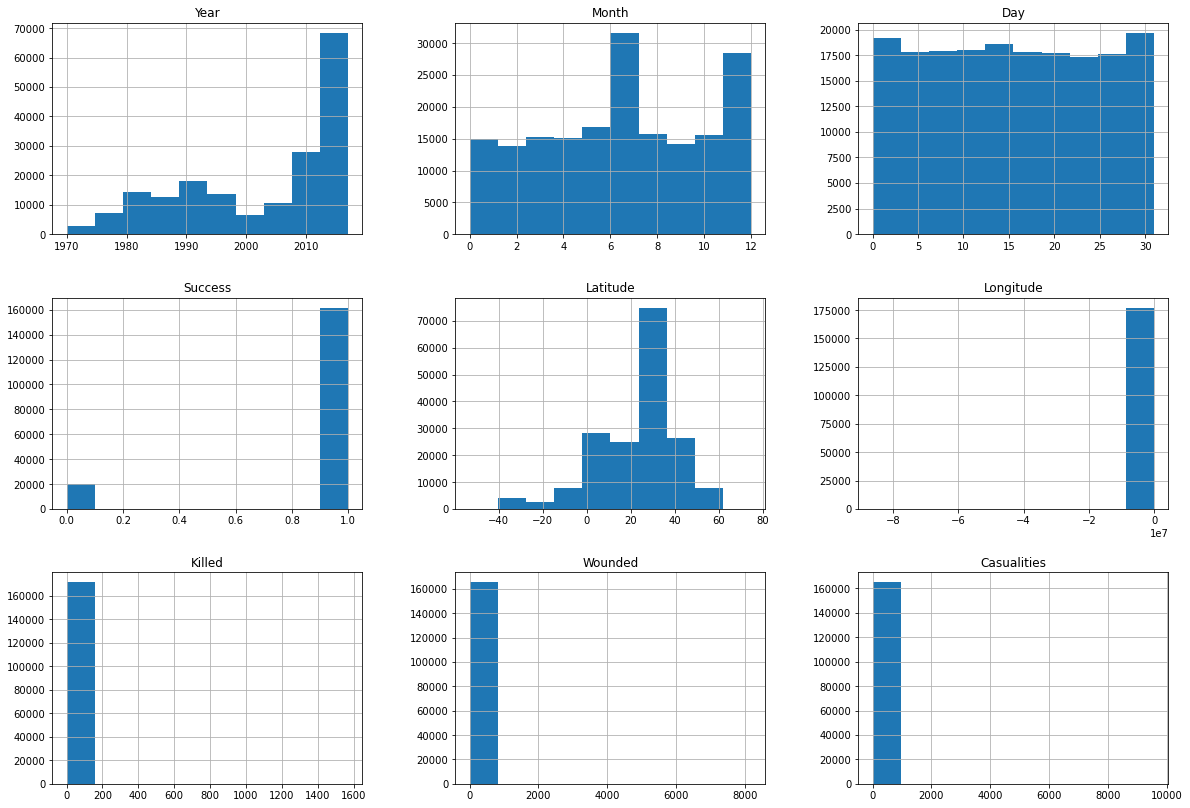

In [31]:
df.hist(figsize = (20, 14))

## Basic Analysis 

In [32]:
print('Country with most attacks:', df['Country'].value_counts().index[0])
print('City with most attacks:', df['City'].value_counts().index[1])
print('Region with most attacks:', df['Region'].value_counts().index[0])
print('Year with most attacks:', df['Year'].value_counts().index[0])
print('Group responsible for most attacks:', df['Group'].value_counts().index[1])
print('Most attack types:', df['Attack Type'].value_counts().index[0])

Country with most attacks: Iraq
City with most attacks: Baghdad
Region with most attacks: Middle East & North Africa
Year with most attacks: 2014
Group responsible for most attacks: Taliban
Most attack types: Bombing/Explosion


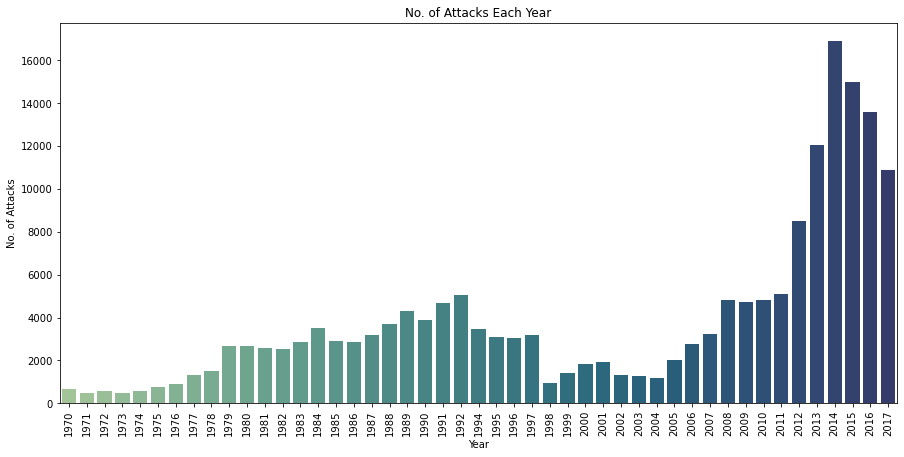

In [33]:
x_year = df['Year'].value_counts().index
y_year = df['Year'].value_counts().values
plt.figure(figsize=(15,7))
sns.barplot(x=x_year, y=y_year, palette='crest')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No. of Attacks')
plt.title('No. of Attacks Each Year')
plt.show()

* Most No. of Terror Attacks were recorded in 2014 followed by 2015
* There was a rapid increase in No. of attacks after 2004

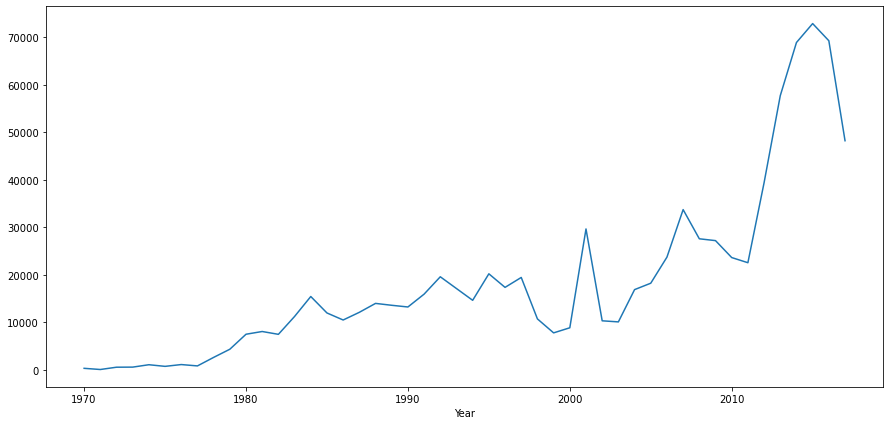

In [34]:
y_cas = df.groupby('Year')['Casualities'].sum().values
x_cas = df.groupby('Year')['Casualities'].sum().index
plt.figure(figsize=(15,7))
sns.lineplot(x=x_cas, y=y_cas)
plt.show()

* There is a rapid increase in the number of casualties after 2000
* The most number of casualties takes place in 2015 (72833)
* After 2015 there is a decline in the number of casualties

## Terror by Region and Country

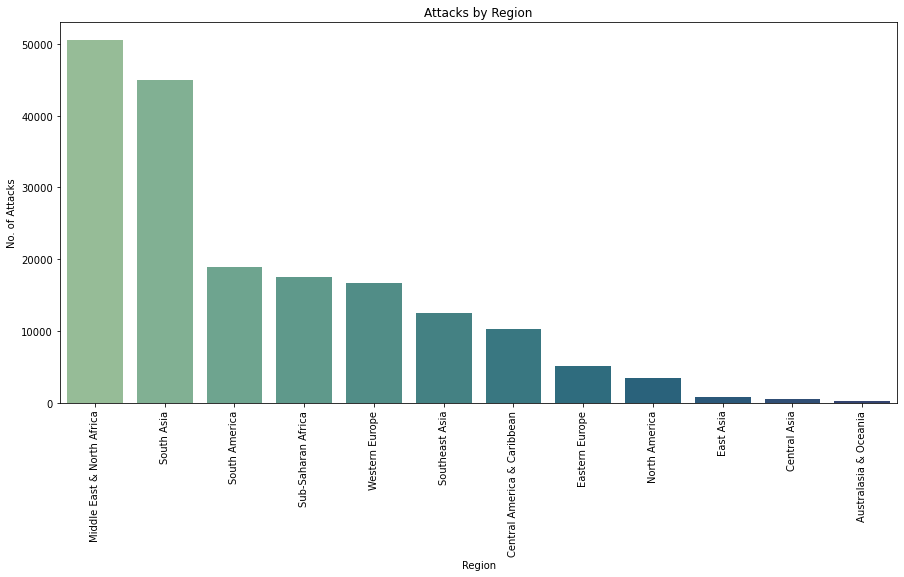

In [35]:
x_region = df.Region.value_counts().index
y_region = df.Region.value_counts().values
plt.figure(figsize=(15,7))
sns.barplot(x=x_region, y=y_region, palette='crest')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('No. of Attacks')
plt.title('Attacks by Region')
plt.show()

* The most affected regions are **Middle East & North Africa** and **South Asia**

(181691,)


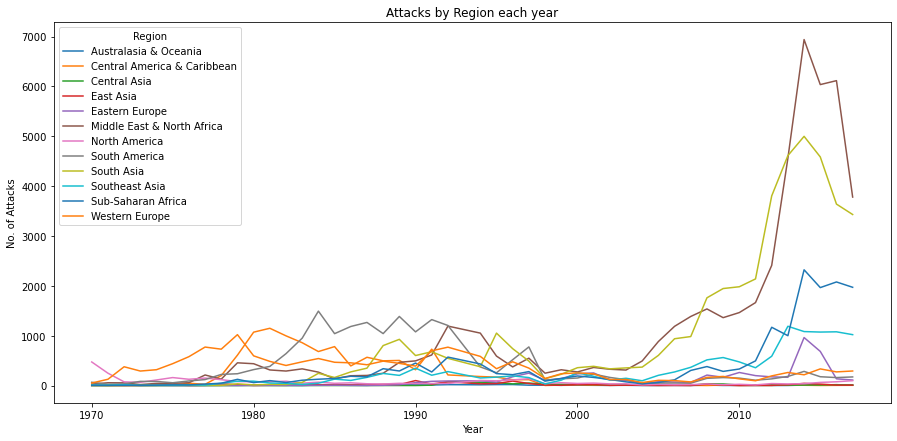

In [36]:
pd.crosstab(df.Year, df.Region).plot(figsize=(15,7))
print(df.Region.shape)
plt.ylabel('No. of Attacks')
plt.title('Attacks by Region each year')
plt.show()

* There is a sudden rise in terror attacks in **Middle East & North Africa** and **South Asia**

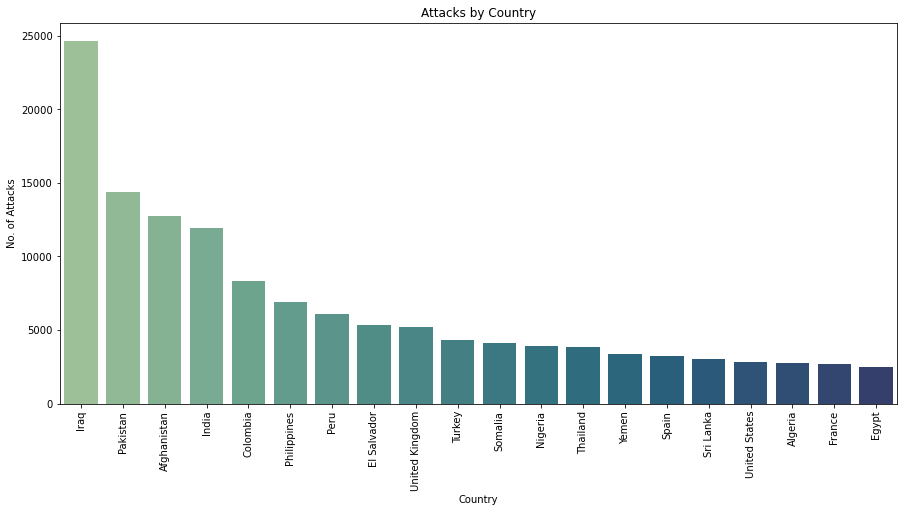

In [37]:
x_cont = df.Country.value_counts().index[:20]
y_cont = df.Country.value_counts().values[:20]
plt.figure(figsize=(15,7))
sns.barplot(x=x_cont, y=y_cont, palette='crest')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('No. of Attacks')
plt.title('Attacks by Country')
plt.show()

* The most affected Countries are **Iraq**, **Pakistan**, **Afghanistan**, **India** and **Columbia**

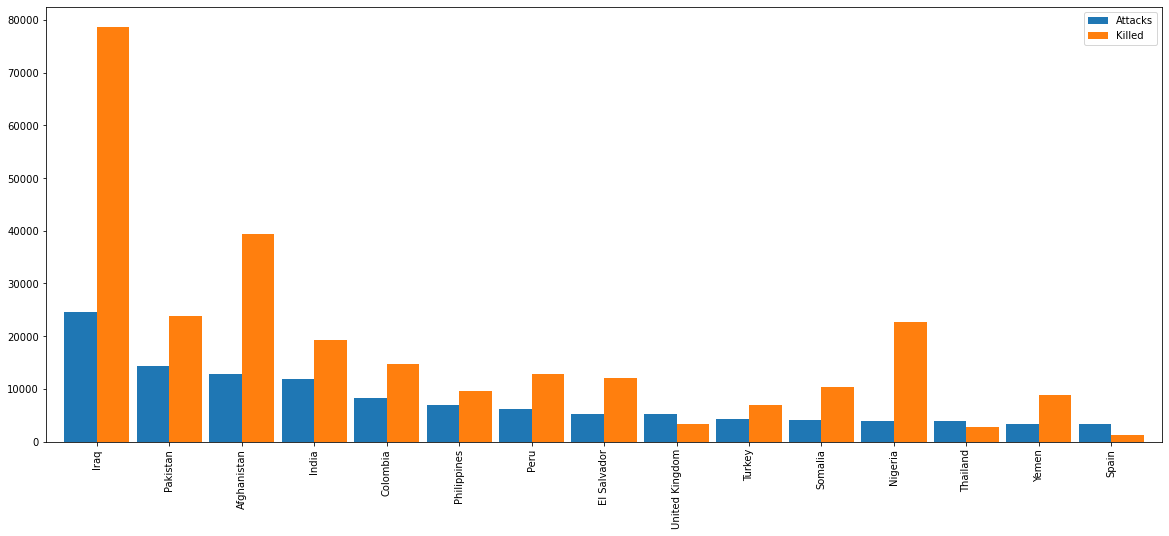

In [38]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show()

* The most number of deaths were recorded in **Iraq**, **Afghanistan**, **Pakistan**, **Nigeria** and **India**

## Terrorist Groups

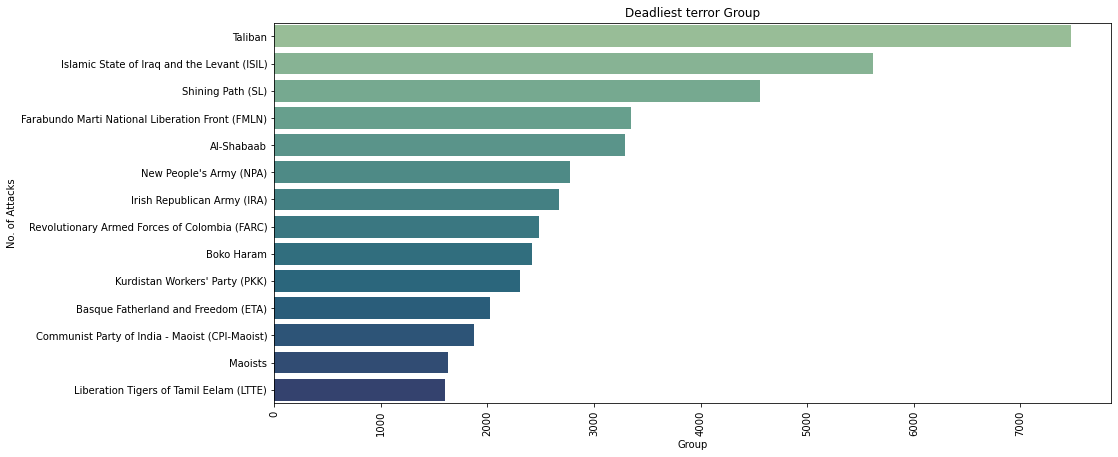

In [39]:
x_grp = df.Group.value_counts().index[1:15]
y_grp = df.Group.value_counts().values[1:15]
plt.figure(figsize=(15,7))
sns.barplot(x=y_grp, y=x_grp, palette='crest')
plt.xticks(rotation=90)
plt.xlabel('Group')
plt.ylabel('No. of Attacks')
plt.title('Deadliest terror Group')
plt.show()

* **Taliban**, **ISIL** and **SL** are the deadliest terror groups in the world

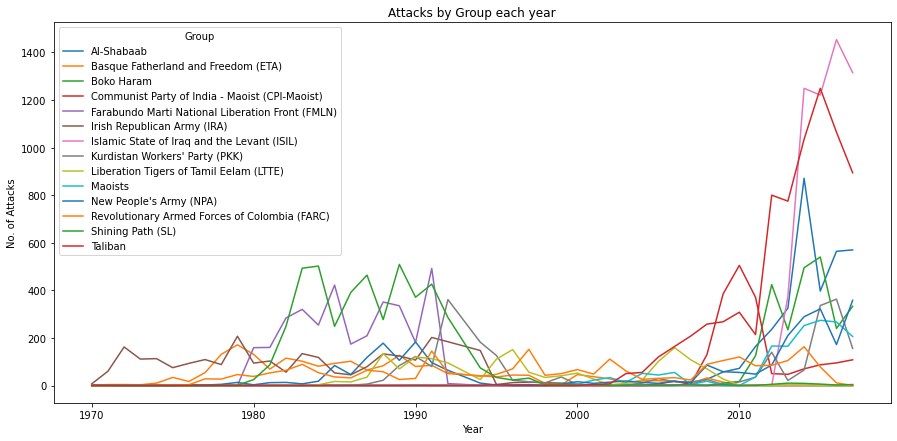

In [40]:
df1 = df[ df.Group.isin(df.Group.value_counts()[1:15].index) ]
pd.crosstab(df1.Year, df1.Group).plot(figsize=(15,7))
plt.ylabel('No. of Attacks')
plt.title('Attacks by Group each year')
plt.show()

* Terror activities by **Taliban** and **ISIL** intensified suddenly around 2010

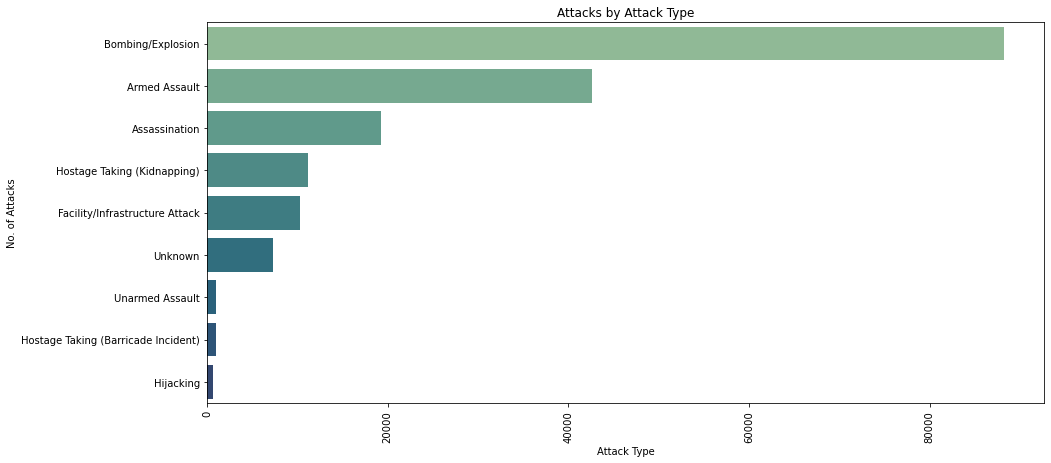

In [41]:
x_atype = df['Attack Type'].value_counts().index
y_atype = df['Attack Type'].value_counts().values
plt.figure(figsize=(15,7))
sns.barplot(x=y_atype, y=x_atype, palette='crest')
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.ylabel('No. of Attacks')
plt.title('Attacks by Attack Type')
plt.show()

* **Bombing** and **Armed Assault** are the most preferred attack types

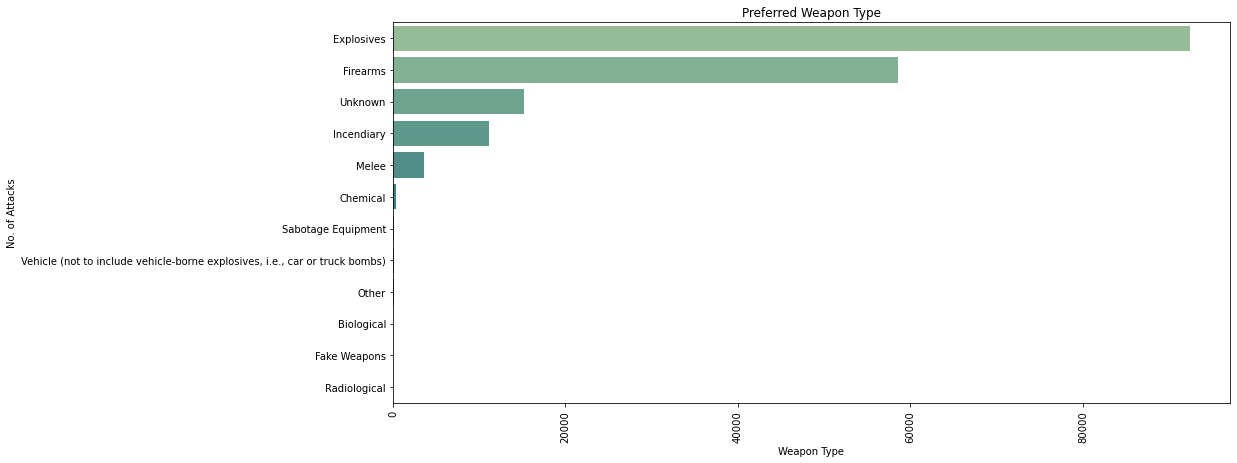

In [42]:
x_atype = df['Weapon Type'].value_counts().index
y_atype = df['Weapon Type'].value_counts().values
plt.figure(figsize=(15,7))
sns.barplot(x=y_atype, y=x_atype, palette='crest')
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.ylabel('No. of Attacks')
plt.title('Preferred Weapon Type')
plt.show()

* **Explosives** and **Firearms** are the most preferred weapon types

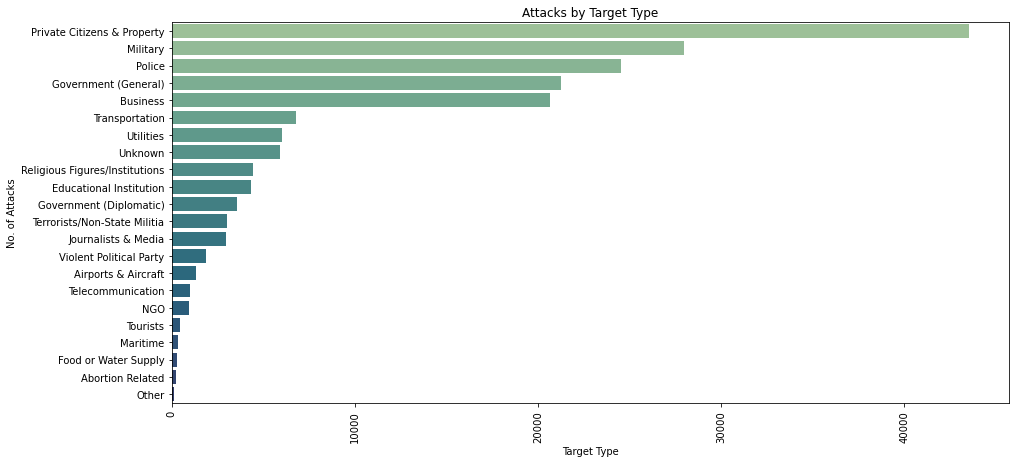

In [43]:
x_atype = df['Target Type'].value_counts().index
y_atype = df['Target Type'].value_counts().values
plt.figure(figsize=(15,7))
sns.barplot(x=y_atype, y=x_atype, palette='crest')
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.ylabel('No. of Attacks')
plt.title('Attacks by Target Type')
plt.show()

* **Private citizen & property**, **military**, **police**, **government** and **business** are the most attacked of all types

## Success Rate

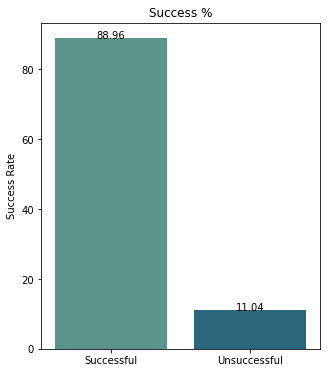

In [44]:
suc = (df["Success"].sum() / len(df)) * 100
unsuc = 100 - suc 
y_suc = [suc, unsuc]
x_suc = ["Successful", "Unsuccessful"]

fig = plt.figure(figsize = (5, 6))
ax=sns.barplot(x = x_suc, y = y_suc, palette='crest')
plt.ylabel("Success Rate")
plt.title("Success %")

ax.text(0, y_suc[0], np.round(y_suc[0], 2), horizontalalignment='center')
ax.text(1, y_suc[1], np.round(y_suc[1], 2),horizontalalignment='center')
plt.show()

* The success rate of terror attacks are extremely high and stands at **88.96 %**